# Assignment 2 – K-Means (Optimal)

## Problem Statement:
You work in XYZ Company as a Python Developer. The company officials want
you to write code for a clustering problem.
Dataset: customers.csv
## Tasks To Be Performed:
1. K-Means Clustering:
- Load customer data
- Check the number of cells in each column with null values
- Create a scatter plot with Age as X and Spending Score as Y
- Find out the best number for clusters between 1 and 10 (inclusive)
using the elbow method
- Draw a scatter plot displaying data points colored on the basis of
clusters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'csv files/customers-1.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

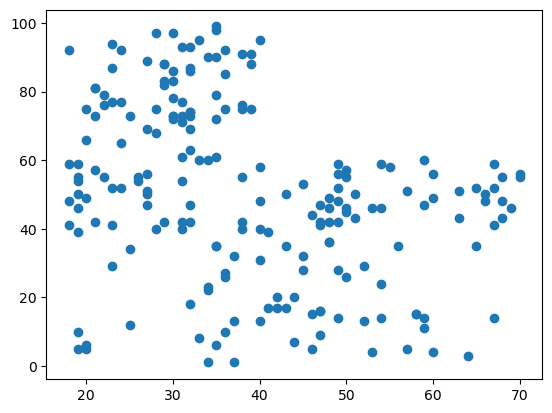

In [4]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.show()

In [5]:
f1 = df['Age'].values
f2 = df['Spending Score (1-100)'].values
X = np.array(list(zip(f1, f2)))

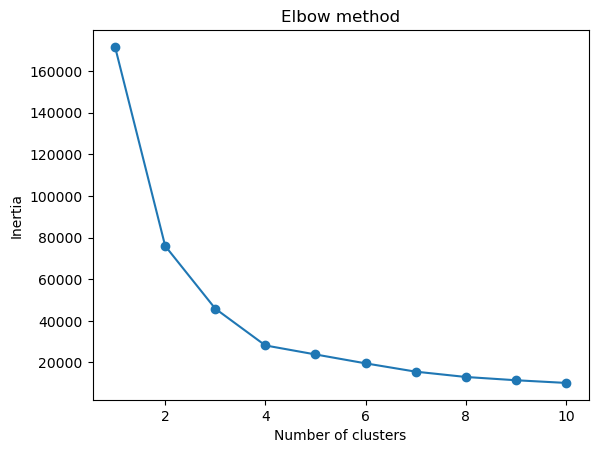

In [6]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [7]:
#Model
k = 4 #No. of cluster
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(n_clusters=4)

In [8]:
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


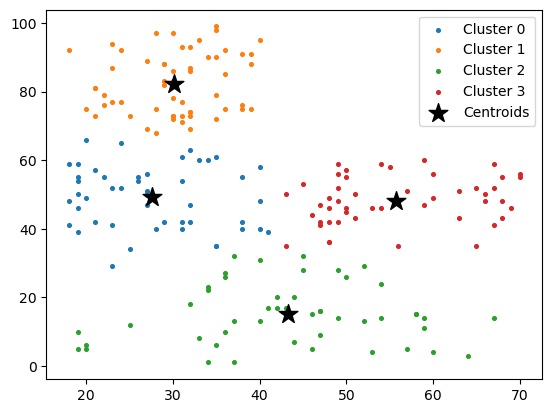

In [9]:
#Scatter plot
for i in range(k):
    plt.scatter(f1[labels == i], f2[labels == i], s=7, label=f'Cluster {i}') # Scatter plot for each cluster

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=200, label='Centroids') # Centroids
plt.legend()
plt.show()